In [1]:
# 데이터 로드
import pandas as pd


df = pd.read_csv('C://Users//gwcat//Downloads//final_data.csv')
df.head(5)

,Unnamed: 0,index,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,...,반납 소재지,반납소 위도,반납소 경도,반납소 보관수,반납소 주소,반납소 동,대여소근처역,대여소Distance,반납소근처역,반납소Distance
0,178,182,SPB-38963,2022-06-01 00:17:09,106,합정역 7번출구 앞,0,2022-06-01 00:48:48,102,망원역 1번출구 앞,...,마포구,37.555649,126.910629,15.0,"스타벅스, 74, 월드컵로, 서교동, 마포구, 서울, 04004, 대한민국",서교동,합정,0.001225,망원,0.000729
1,179,183,SPB-49074,2022-06-01 00:41:18,3123,DMC파크뷰자이1단지 110동 앞,0,2022-06-01 01:14:29,102,망원역 1번출구 앞,...,마포구,37.555649,126.910629,15.0,"스타벅스, 74, 월드컵로, 서교동, 마포구, 서울, 04004, 대한민국",서교동,가좌,0.003915,망원,0.000729
2,180,184,SPB-54595,2022-06-01 01:12:13,497,합정동주민센터 앞,0,2022-06-01 01:15:55,102,망원역 1번출구 앞,...,마포구,37.555649,126.910629,15.0,"스타벅스, 74, 월드컵로, 서교동, 마포구, 서울, 04004, 대한민국",서교동,합정,0.002705,망원,0.000729
3,181,185,SPB-82472,2022-06-01 01:43:20,114,홍대입구역 8번출구 앞,99,2022-06-01 01:52:43,102,망원역 1번출구 앞,...,마포구,37.555649,126.910629,15.0,"스타벅스, 74, 월드컵로, 서교동, 마포구, 서울, 04004, 대한민국",서교동,홍대입구,0.000967,망원,0.000729
4,182,186,SPB-58359,2022-06-01 00:05:01,135,명물길 원형무대 앞,0,2022-06-01 01:53:22,102,망원역 1번출구 앞,...,마포구,37.555649,126.910629,15.0,"스타벅스, 74, 월드컵로, 서교동, 마포구, 서울, 04004, 대한민국",서교동,신촌,0.004578,망원,0.000729


In [2]:
from tqdm import tqdm

df['대여일시']
df['대여일'] = df['대여일시'].str.split(" ", expand=True)[0]
df['대여시간'] = df['대여일시'].str.split(" ", expand=True)[1]
df['대여시간'] = df['대여시간'].str.split(":", expand=True)[0]

from datetime import datetime, date

def what_day(date):
    days = ['월', '화', '수', '목', '금', '토', '일']
    day = date.weekday()
    return days[day]
    
dday = []
for i in tqdm(range(len(df))):
    qday = df['대여일'][i]
    datetime_date = datetime.strptime(qday, '%Y-%m-%d')
    qday = what_day(datetime_date)
    dday.append(qday)
df['대여요일'] = dday

df['반납일시']
df['반납일'] = df['반납일시'].str.split(" ", expand=True)[0]
df['반납시간'] = df['반납일시'].str.split(" ", expand=True)[1]
df['반납시간'] = df['반납시간'].str.split(":", expand=True)[0]
    
dday = []
for i in range(len(df)):
    qday = df['반납일'][i]
    datetime_date = datetime.strptime(qday, '%Y-%m-%d')
    qday = what_day(datetime_date)
    dday.append(qday)
df['반납요일'] = dday
df

100%|█████████████████████████████████████████████████████████████████████| 4171745/4171745 [01:54<00:00, 36578.24it/s]


,Unnamed: 0,index,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,...,대여소근처역,대여소Distance,반납소근처역,반납소Distance,대여일,대여시간,대여요일,반납일,반납시간,반납요일
0,178,182,SPB-38963,2022-06-01 00:17:09,106,합정역 7번출구 앞,0,2022-06-01 00:48:48,102,망원역 1번출구 앞,...,합정,0.001225,망원,0.000729,2022-06-01,00,수,2022-06-01,00,수
1,179,183,SPB-49074,2022-06-01 00:41:18,3123,DMC파크뷰자이1단지 110동 앞,0,2022-06-01 01:14:29,102,망원역 1번출구 앞,...,가좌,0.003915,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수
2,180,184,SPB-54595,2022-06-01 01:12:13,497,합정동주민센터 앞,0,2022-06-01 01:15:55,102,망원역 1번출구 앞,...,합정,0.002705,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
3,181,185,SPB-82472,2022-06-01 01:43:20,114,홍대입구역 8번출구 앞,99,2022-06-01 01:52:43,102,망원역 1번출구 앞,...,홍대입구,0.000967,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
4,182,186,SPB-58359,2022-06-01 00:05:01,135,명물길 원형무대 앞,0,2022-06-01 01:53:22,102,망원역 1번출구 앞,...,신촌,0.004578,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171740,4181916,4196913,SPB-30739,2022-06-28 21:21:40,255,도림사거리,0,2022-06-28 21:28:13,5852,대림동현대2차 201동 앞,...,신도림,0.010068,신도림,0.006255,2022-06-28,21,화,2022-06-28,21,화
4171741,4181917,4196914,SPB-81496,2022-06-29 02:53:22,281,신동아아파트 앞,99,2022-06-29 02:59:24,5852,대림동현대2차 201동 앞,...,대림,0.005576,신도림,0.006255,2022-06-29,02,수,2022-06-29,02,수
4171742,4181918,4196915,SPB-53328,2022-06-29 10:15:15,1961,신도림테크노근린공원,0,2022-06-29 10:20:31,5852,대림동현대2차 201동 앞,...,신도림,0.000531,신도림,0.006255,2022-06-29,10,수,2022-06-29,10,수
4171743,4181919,4196916,SPB-47475,2022-06-29 14:49:09,1961,신도림테크노근린공원,0,2022-06-29 15:49:09,5852,대림동현대2차 201동 앞,...,신도림,0.000531,신도림,0.006255,2022-06-29,14,수,2022-06-29,15,수


In [24]:
# 필요없는 컬럼 삭제 
# del df['Unnamed: 0']
# del df['index']
# del df['대여소 보관수']
# del df['반납소 보관수']
df.head(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,...,대여소근처역,대여소Distance,반납소근처역,반납소Distance,대여일,대여시간,대여요일,반납일,반납시간,반납요일
0,SPB-38963,2022-06-01 00:17:09,106,합정역 7번출구 앞,0,2022-06-01 00:48:48,102,망원역 1번출구 앞,31,728.58,...,합정,0.001225,망원,0.000729,2022-06-01,00,수,2022-06-01,00,수
1,SPB-49074,2022-06-01 00:41:18,3123,DMC파크뷰자이1단지 110동 앞,0,2022-06-01 01:14:29,102,망원역 1번출구 앞,33,3040.00,...,가좌,0.003915,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수
2,SPB-54595,2022-06-01 01:12:13,497,합정동주민센터 앞,0,2022-06-01 01:15:55,102,망원역 1번출구 앞,3,550.00,...,합정,0.002705,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
3,SPB-82472,2022-06-01 01:43:20,114,홍대입구역 8번출구 앞,99,2022-06-01 01:52:43,102,망원역 1번출구 앞,9,1830.00,...,홍대입구,0.000967,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
4,SPB-58359,2022-06-01 00:05:01,135,명물길 원형무대 앞,0,2022-06-01 01:53:22,102,망원역 1번출구 앞,108,7600.00,...,신촌,0.004578,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수


In [65]:
# 데이터 타입 알아보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171745 entries, 0 to 4171744
Data columns (total 30 columns):
 #   Column       Dtype  
---  ------       -----  
 0   자전거번호        object 
 1   대여일시         object 
 2   대여 대여소번호     int64  
 3   대여 대여소명      object 
 4   대여거치대        int64  
 5   반납일시         object 
 6   반납대여소번호      int64  
 7   반납대여소명       object 
 8   이용시간         int64  
 9   이용거리         float64
 10  대여 소재지       object 
 11  대여소 위도       float64
 12  대여소 경도       float64
 13  대여소 주소       object 
 14  대여소 동        object 
 15  반납 소재지       object 
 16  반납소 위도       float64
 17  반납소 경도       float64
 18  반납소 주소       object 
 19  반납소 동        object 
 20  대여소근처역       object 
 21  대여소Distance  float64
 22  반납소근처역       object 
 23  반납소Distance  float64
 24  대여일          object 
 25  대여시간         object 
 26  대여요일         object 
 27  반납일          object 
 28  반납시간         object 
 29  반납요일         object 
dtypes: float64(7), int64(4), object(19)
memory usage: 

In [4]:
# 많이 이용하는 대여소-반납소 Top 10 
df[['대여 대여소명','반납대여소명']].value_counts().head(10)

대여 대여소명        반납대여소명       
한강공원 망원나들목     한강공원 망원나들목       3113
뚝섬유원지역 1번출구 앞  뚝섬유원지역 1번출구 앞    2623
여의나루역 1번출구 앞   여의나루역 1번출구 앞     2342
봉림교 교통섬        봉림교 교통섬          1652
월드컵공원          월드컵공원            1554
옥수역 3번출구       옥수역 3번출구         1370
당산육갑문          당산육갑문            1212
서울숲 관리사무소      서울숲 관리사무소        1197
올림픽공원역 3번출구    올림픽공원역 3번출구      1182
천왕역 1번 출입구 앞   천왕이펜하우스5단지 앞     1164
dtype: int64

In [56]:
# 많이 이용하는 시간대 
df[['대여시간','반납시간']].value_counts().head(20)

대여시간  반납시간
18    18      278967
08    08      226167
17    17      199545
19    19      197291
20    20      162303
21    21      157135
16    16      156066
22    22      147381
07    07      136660
15    15      121136
09    09      120638
18    19      118977
12    12      112836
13    13      111373
17    18      109736
14    14      103347
11    11       99226
23    23       98410
19    20       96800
20    21       91064
dtype: int64

In [52]:
# 많이 이용하는 시간대 
df[['대여시간','반납시간','이용시간']].value_counts().head(20)

대여시간  반납시간  이용시간
08    08    4       21705
            5       21072
18    18    5       19180
            6       18874
08    08    3       18618
            6       18587
18    18    4       18259
            7       17169
08    08    7       15970
18    18    8       15837
17    17    5       14670
07    07    4       14570
18    18    9       14470
17    17    6       14048
19    19    5       14027
08    08    8       13939
17    17    4       13733
18    18    3       13723
19    19    6       13643
07    07    5       13395
dtype: int64

<AxesSubplot:>

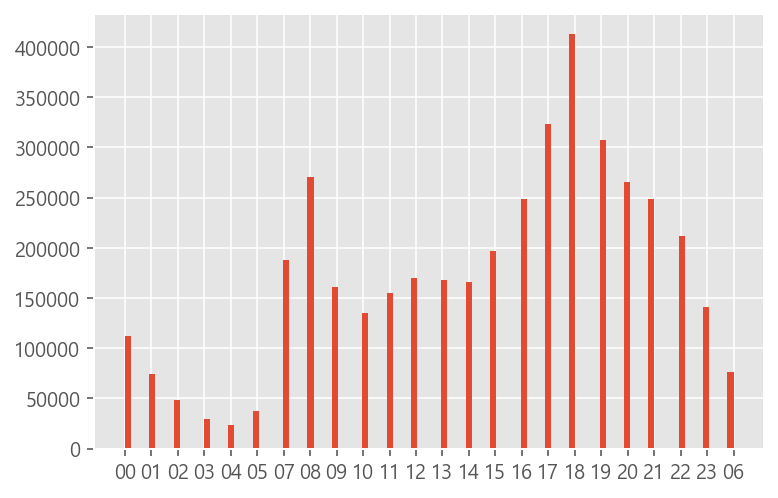

In [107]:
# 많이 이용하는 시간대 
df['대여시간'].hist(bins=100)

In [71]:
#한글 폰트 설정 -> 그래프에서 한글깨짐 방지
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

In [59]:
# 주말데이터만 보기

weekend_data = df[(df['반납요일']=='토')|(df['반납요일']=='일')]
weekend_data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,...,대여소근처역,대여소Distance,반납소근처역,반납소Distance,대여일,대여시간,대여요일,반납일,반납시간,반납요일
634,SPB-57719,2022-06-03 23:56:44,181,망원초록길 입구,0,2022-06-04 00:03:29,102,망원역 1번출구 앞,6,1052.05,...,망원,0.008778,망원,0.000729,2022-06-03,23,금,2022-06-04,00,토
635,SPB-50408,2022-06-03 23:58:14,3009,서교동사거리(신),0,2022-06-04 00:04:09,102,망원역 1번출구 앞,5,906.29,...,홍대입구,0.005130,망원,0.000729,2022-06-03,23,금,2022-06-04,00,토
636,SPB-62880,2022-06-03 23:52:34,4233,코오롱아파트사거리,0,2022-06-04 00:18:38,102,망원역 1번출구 앞,26,2200.00,...,홍대입구,0.007054,망원,0.000729,2022-06-03,23,금,2022-06-04,00,토
637,SPB-32837,2022-06-04 00:10:38,3002,벽산상암스마트큐브,0,2022-06-04 00:22:08,102,망원역 1번출구 앞,11,1228.53,...,마포구청,0.001551,망원,0.000729,2022-06-04,00,토,2022-06-04,00,토
638,SPB-52219,2022-06-04 00:18:55,184,7번가피자 서교망원점,0,2022-06-04 00:23:02,102,망원역 1번출구 앞,4,496.95,...,망원,0.003665,망원,0.000729,2022-06-04,00,토,2022-06-04,00,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171724,SPB-57718,2022-06-25 23:02:44,2102,봉림교 교통섬,0,2022-06-25 23:28:22,5852,대림동현대2차 201동 앞,25,5480.93,...,신림,0.002830,신도림,0.006255,2022-06-25,23,토,2022-06-25,23,토
4171725,SPB-63808,2022-06-26 10:50:36,2183,동방1교,0,2022-06-26 11:33:55,5852,대림동현대2차 201동 앞,43,10790.00,...,신림,0.013068,신도림,0.006255,2022-06-26,10,일,2022-06-26,11,일
4171726,SPB-31919,2022-06-26 14:02:24,4567,한림대학교 강남성심병원 신관,0,2022-06-26 14:29:16,5852,대림동현대2차 201동 앞,26,3765.96,...,신대방,0.006396,신도림,0.006255,2022-06-26,14,일,2022-06-26,14,일
4171727,SPB-36891,2022-06-26 14:25:27,1961,신도림테크노근린공원,0,2022-06-26 14:36:24,5852,대림동현대2차 201동 앞,10,1104.47,...,신도림,0.000531,신도림,0.006255,2022-06-26,14,일,2022-06-26,14,일


<AxesSubplot:>

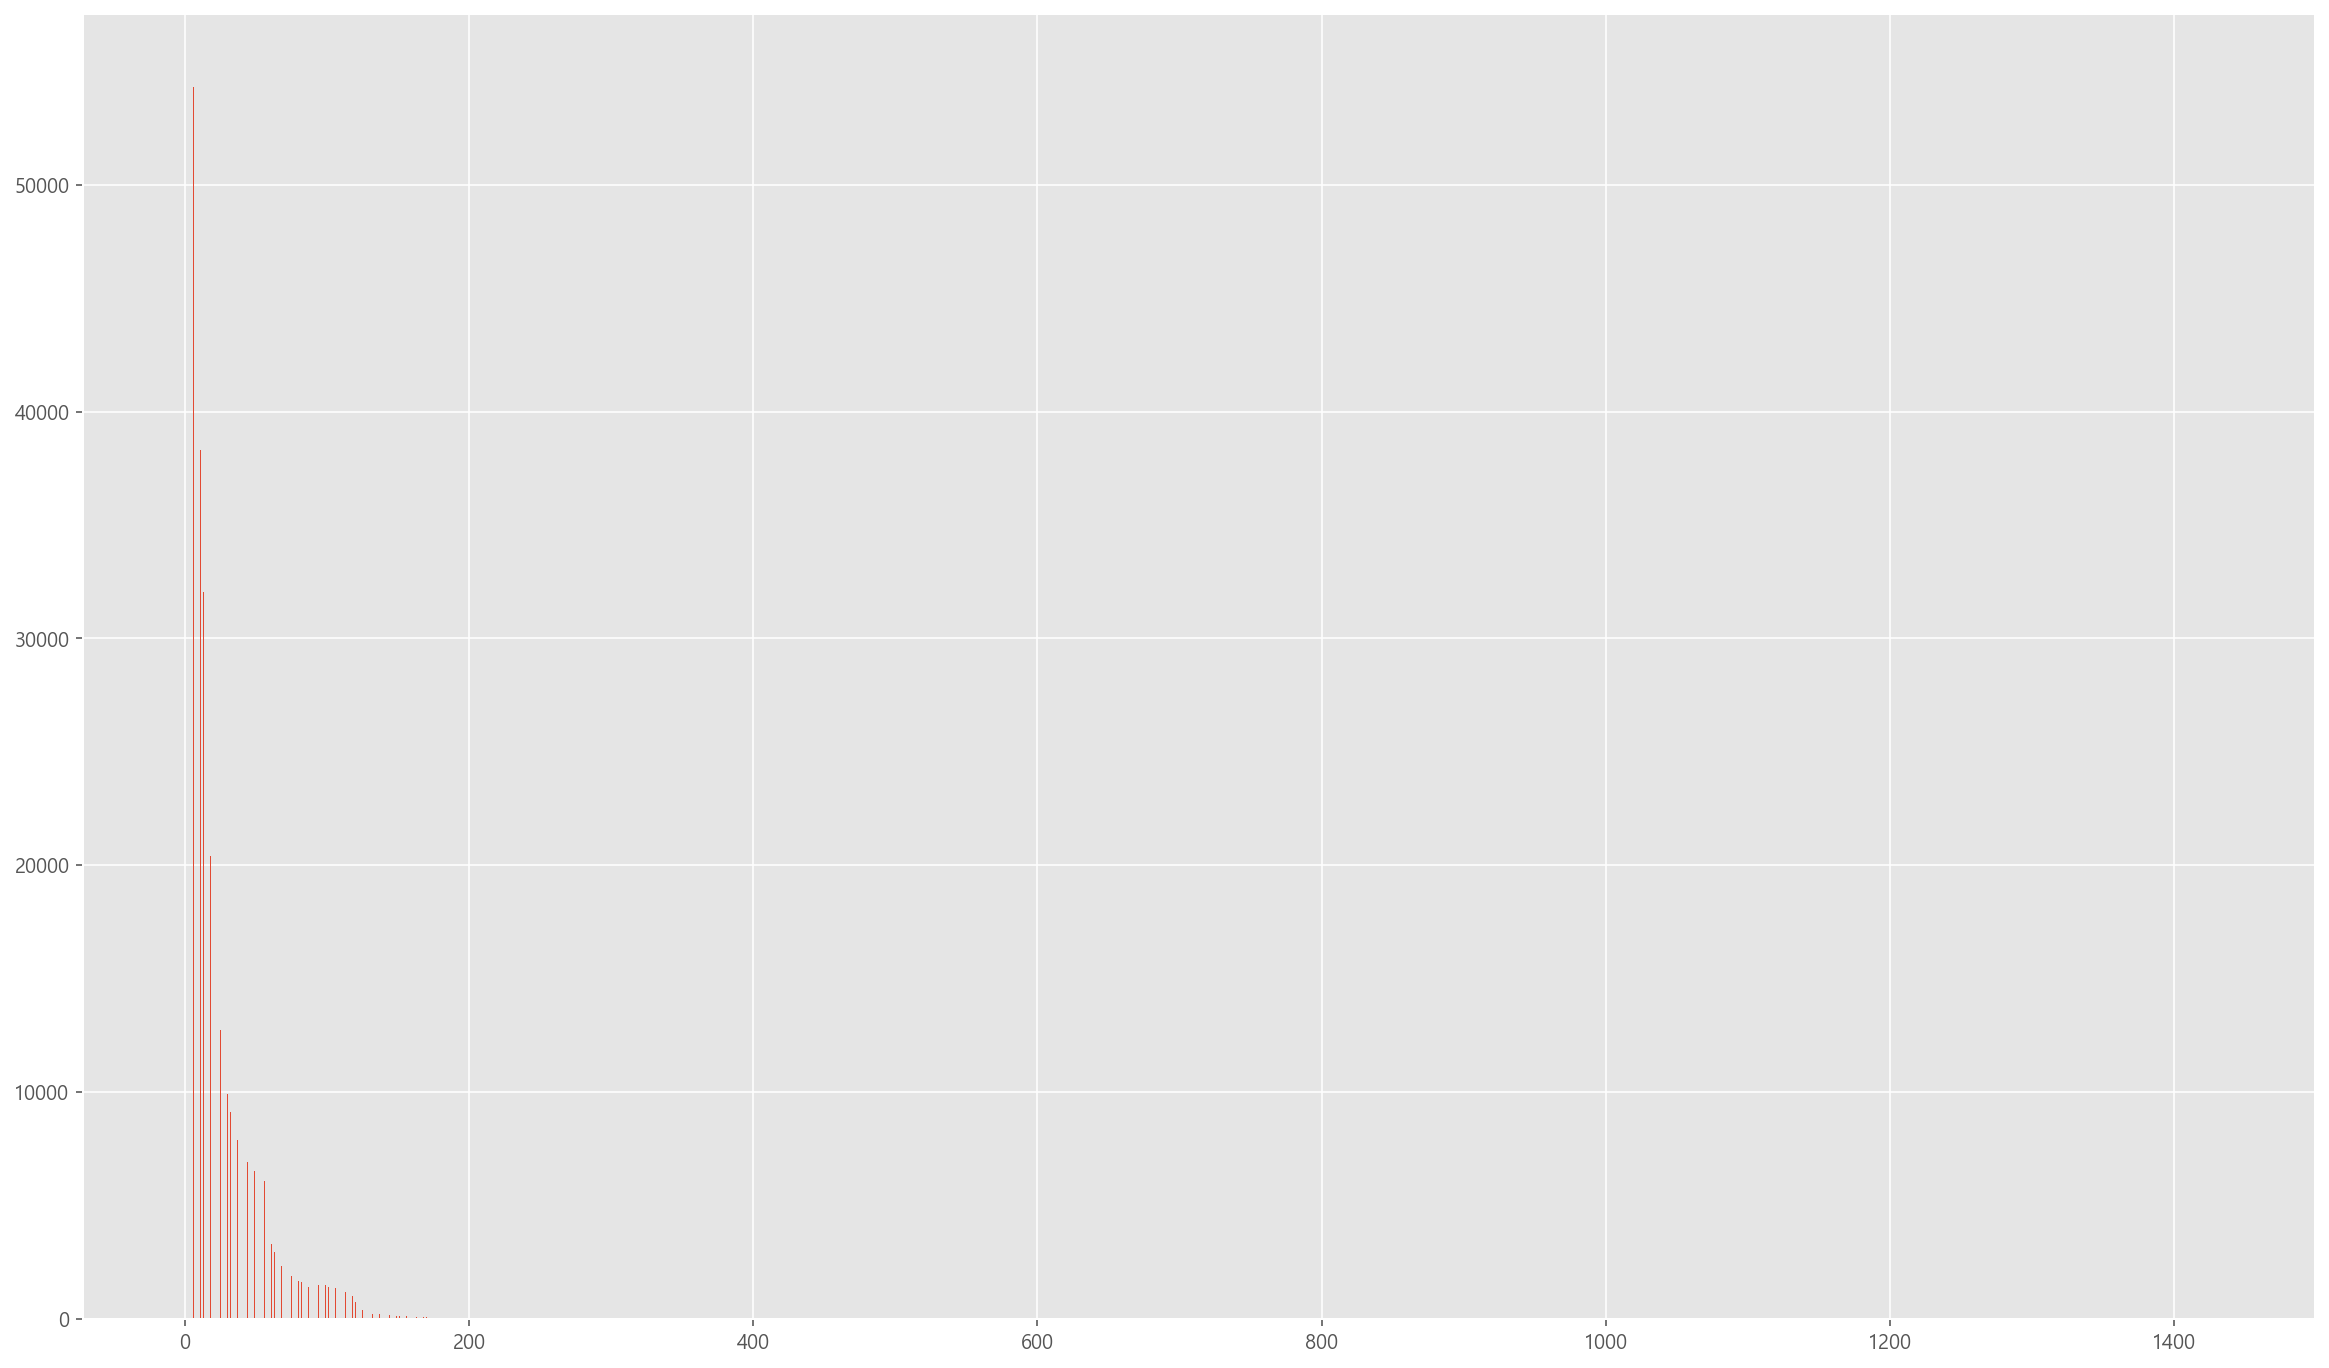

In [80]:
weekend_data['이용시간'].hist(figsize=(20,12), bins=10000)

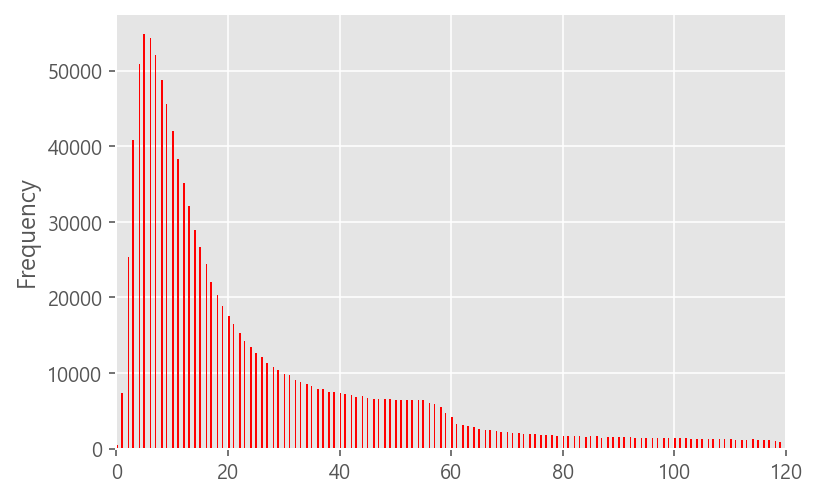

In [84]:
weekend_data['이용시간'].plot.hist(bins=5000,color="red")
plt.xlim([0,120])
plt.show()

array([[<AxesSubplot:title={'center':'대여 대여소번호'}>,
        <AxesSubplot:title={'center':'대여거치대'}>]], dtype=object)

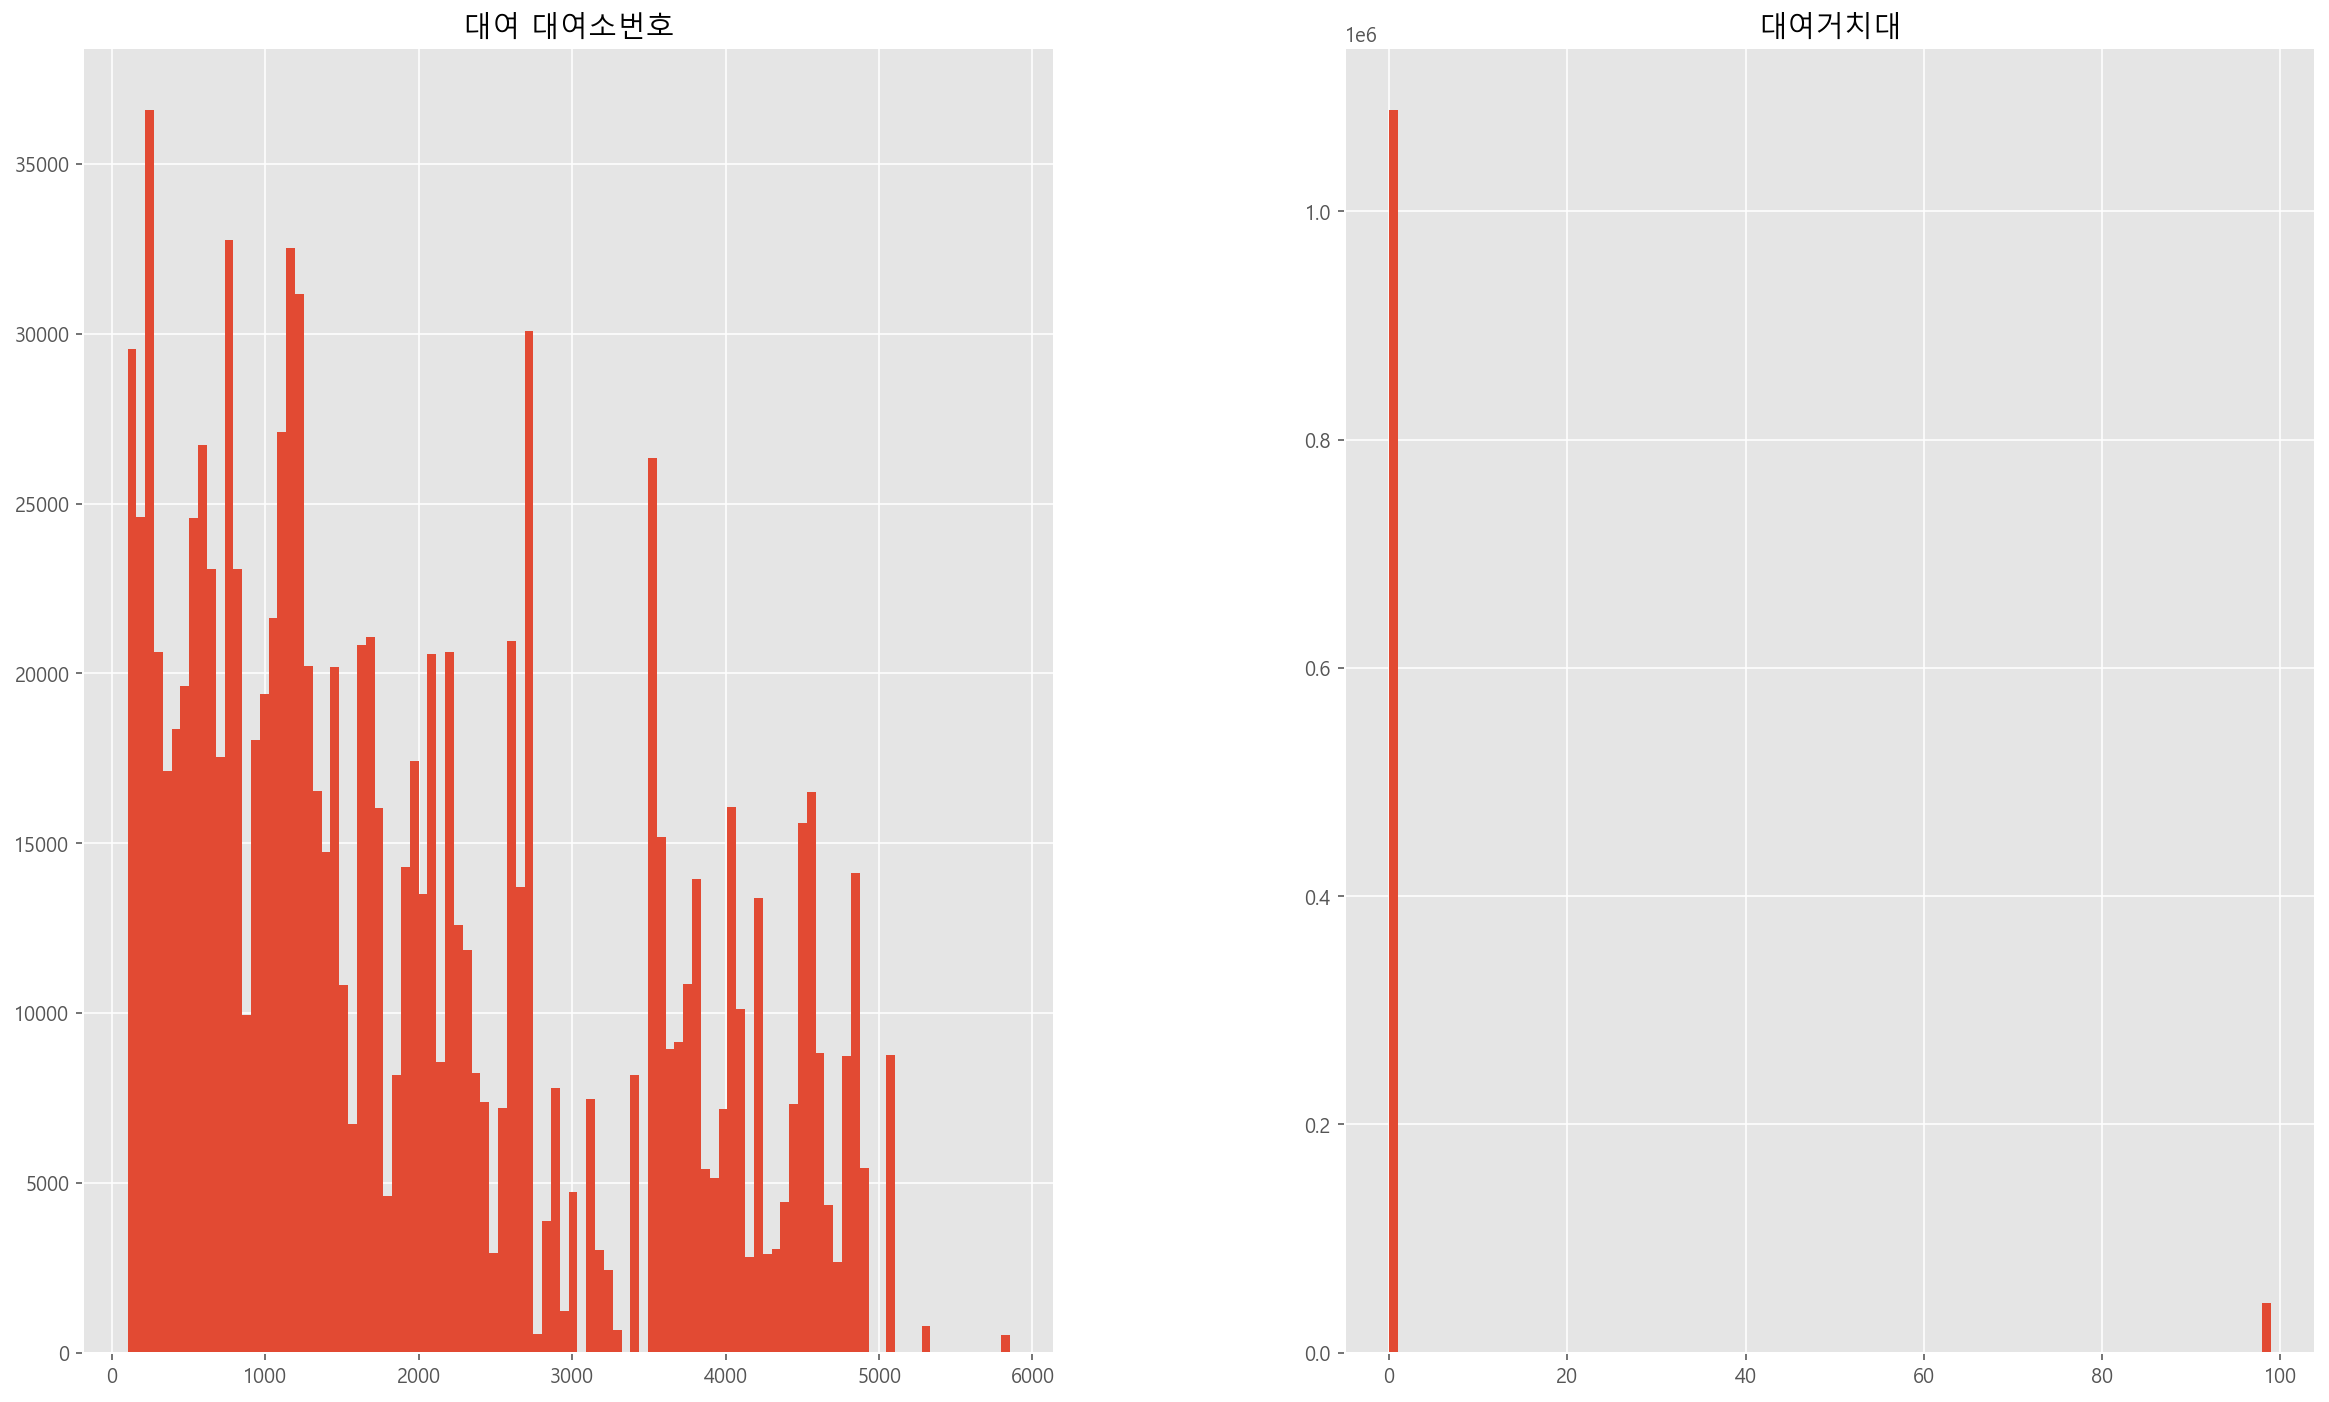

In [78]:

weekend_data.iloc[:,:5].hist(figsize=(20,12), bins=100)

weekend_data['대여시간'].hist(bins=100)

<AxesSubplot:>

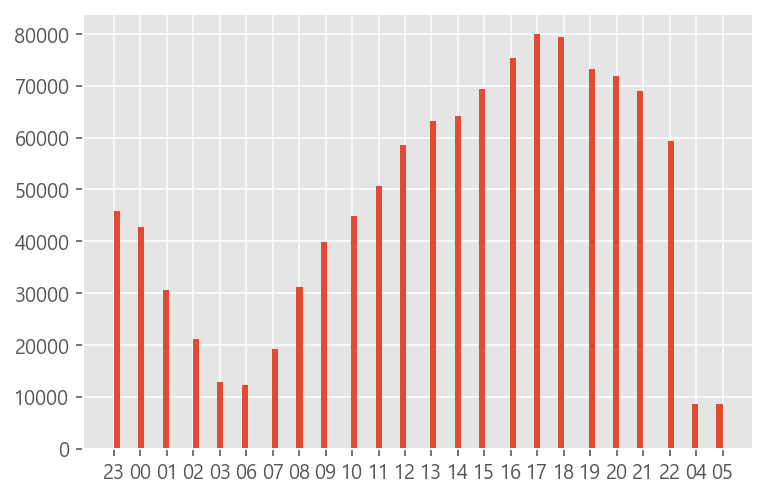

In [111]:
weekend_data['대여시간'].hist(bins=100)

In [60]:
# 평일데이터만 보기

weekday_data = df[~(df['반납요일']=='토')&~(df['반납요일']=='일')]
weekday_data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,...,대여소근처역,대여소Distance,반납소근처역,반납소Distance,대여일,대여시간,대여요일,반납일,반납시간,반납요일
0,SPB-38963,2022-06-01 00:17:09,106,합정역 7번출구 앞,0,2022-06-01 00:48:48,102,망원역 1번출구 앞,31,728.58,...,합정,0.001225,망원,0.000729,2022-06-01,00,수,2022-06-01,00,수
1,SPB-49074,2022-06-01 00:41:18,3123,DMC파크뷰자이1단지 110동 앞,0,2022-06-01 01:14:29,102,망원역 1번출구 앞,33,3040.00,...,가좌,0.003915,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수
2,SPB-54595,2022-06-01 01:12:13,497,합정동주민센터 앞,0,2022-06-01 01:15:55,102,망원역 1번출구 앞,3,550.00,...,합정,0.002705,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
3,SPB-82472,2022-06-01 01:43:20,114,홍대입구역 8번출구 앞,99,2022-06-01 01:52:43,102,망원역 1번출구 앞,9,1830.00,...,홍대입구,0.000967,망원,0.000729,2022-06-01,01,수,2022-06-01,01,수
4,SPB-58359,2022-06-01 00:05:01,135,명물길 원형무대 앞,0,2022-06-01 01:53:22,102,망원역 1번출구 앞,108,7600.00,...,신촌,0.004578,망원,0.000729,2022-06-01,00,수,2022-06-01,01,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171740,SPB-30739,2022-06-28 21:21:40,255,도림사거리,0,2022-06-28 21:28:13,5852,대림동현대2차 201동 앞,6,846.63,...,신도림,0.010068,신도림,0.006255,2022-06-28,21,화,2022-06-28,21,화
4171741,SPB-81496,2022-06-29 02:53:22,281,신동아아파트 앞,99,2022-06-29 02:59:24,5852,대림동현대2차 201동 앞,6,620.00,...,대림,0.005576,신도림,0.006255,2022-06-29,02,수,2022-06-29,02,수
4171742,SPB-53328,2022-06-29 10:15:15,1961,신도림테크노근린공원,0,2022-06-29 10:20:31,5852,대림동현대2차 201동 앞,5,750.51,...,신도림,0.000531,신도림,0.006255,2022-06-29,10,수,2022-06-29,10,수
4171743,SPB-47475,2022-06-29 14:49:09,1961,신도림테크노근린공원,0,2022-06-29 15:49:09,5852,대림동현대2차 201동 앞,60,820.00,...,신도림,0.000531,신도림,0.006255,2022-06-29,14,수,2022-06-29,15,수


In [34]:
# 주말데이터만 보기

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['대여 대여소명','반납대여소명']].value_counts().head(10)

대여 대여소명          반납대여소명         
한강공원 망원나들목       한강공원 망원나들목         1375
뚝섬유원지역 1번출구 앞    뚝섬유원지역 1번출구 앞      1105
여의나루역 1번출구 앞     여의나루역 1번출구 앞       1102
월드컵공원            월드컵공원               854
서울숲 관리사무소        서울숲 관리사무소           680
봉림교 교통섬          봉림교 교통섬             591
올림픽공원역 3번출구      올림픽공원역 3번출구         552
옥수역 3번출구         옥수역 3번출구            537
당산육갑문            당산육갑문               523
한신16차아파트 119동 앞  한신16차아파트 119동 앞     469
dtype: int64

In [44]:
# 주말데이터 주로 이용하는 시간 파악하기 

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['대여시간','반납시간']].value_counts().head(10)

대여시간  반납시간
18    18      48435
17    17      47913
16    16      44698
19    19      42226
15    15      41467
21    21      40963
20    20      40752
13    13      40512
14    14      39146
22    22      38519
dtype: int64

In [87]:
# 주말데이터 주로 이용시간  파악하기 

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['대여시간','반납시간','이용시간']].value_counts().head(30)

대여시간  반납시간  이용시간
17    17    5       3278
            6       3245
18    18    6       3185
16    16    5       3141
18    18    5       3125
13    13    5       3108
17    17    7       3045
13    13    6       2964
16    16    6       2963
18    18    7       2950
13    13    4       2915
17    17    4       2913
18    18    4       2912
15    15    5       2909
14    14    5       2897
12    12    5       2876
16    16    4       2859
12    12    6       2845
15    15    6       2841
17    17    8       2823
14    14    6       2788
15    15    4       2757
18    18    8       2749
16    16    7       2748
12    12    4       2746
19    19    5       2696
14    14    4       2694
15    15    7       2676
19    19    7       2668
12    12    7       2656
dtype: int64

In [45]:
# 주말데이터 주로 대여하는 시간 파악하기 

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['대여시간']].value_counts().head(10)

대여시간
17      79909
18      79442
16      75403
19      73239
20      71940
15      69390
21      68905
14      64145
13      63254
22      59350
dtype: int64

In [46]:
# 주말데이터 주로 반납하는 시간 파악하기 

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['반납시간']].value_counts().head(10)

반납시간
18      80356
17      78615
19      73285
21      72453
16      72373
20      71938
22      67428
15      65785
14      61300
13      61056
dtype: int64

In [64]:
# 주말데이터 주로 반납하는 시간 파악하기 

df[(df['반납요일']=='토')|(df['반납요일']=='일')][['이용시간']].value_counts().head(30)

이용시간
5       54791
6       54321
7       52021
4       50843
8       48733
9       45596
10      42062
3       40875
11      38316
12      35178
13      32030
14      28898
15      26665
2       25381
16      24455
17      22012
18      20379
19      18929
20      17551
21      16452
22      15267
23      14261
24      13431
25      12709
26      12063
27      11295
28      10791
29      10354
30       9905
31       9739
dtype: int64

In [40]:
# 평일 데이터만 보기

df[~(df['반납요일']=='토')&~(df['반납요일']=='일')][['대여 대여소명','반납대여소명']].value_counts().head(10)

대여 대여소명        반납대여소명       
한강공원 망원나들목     한강공원 망원나들목       1738
뚝섬유원지역 1번출구 앞  뚝섬유원지역 1번출구 앞    1518
여의나루역 1번출구 앞   여의나루역 1번출구 앞     1240
봉림교 교통섬        봉림교 교통섬          1061
천왕역 1번 출입구 앞   천왕이펜하우스5단지 앞      994
코오롱One&Only타워  마곡나루역 3번 출구       898
서울축산농협(장안지점)   장한평역 1번출구         847
옥수역 3번출구       옥수역 3번출구          833
천왕이펜하우스5단지 앞   천왕역 1번 출입구 앞      818
그랜드아이파크아파트 앞   가양역 8번출구          794
dtype: int64

In [99]:
# 평일 데이터 주로 이용하는 시간 파악하기 

df[~(df['반납요일']=='토')&~(df['반납요일']=='일')][['대여시간','반납시간']].value_counts().head(20)

대여시간  반납시간
18    18      230532
08    08      204478
19    19      155065
17    17      151632
07    07      124024
20    20      121551
21    21      116172
16    16      111368
22    22      108862
09    09       93654
18    19       92133
17    18       82030
15    15       79669
12    12       74943
13    13       70861
19    20       69855
23    23       69667
11    11       66873
14    14       64201
20    21       63645
dtype: int64

<AxesSubplot:>

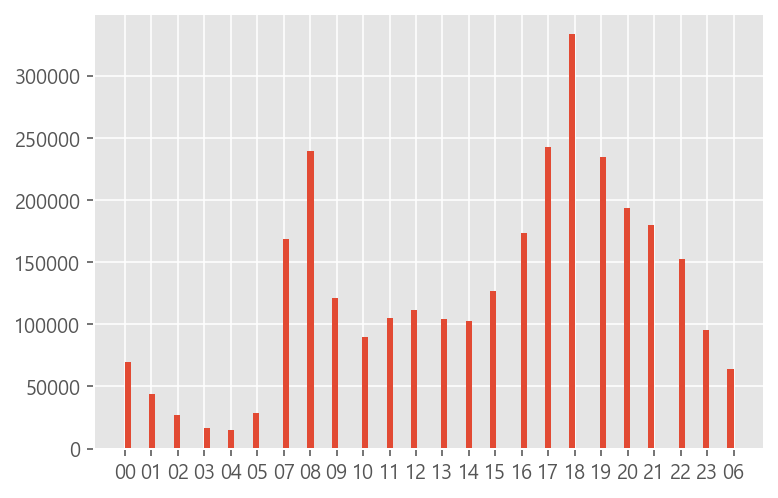

In [104]:
weekday_data['대여시간'].hist(bins=100)

<AxesSubplot:>

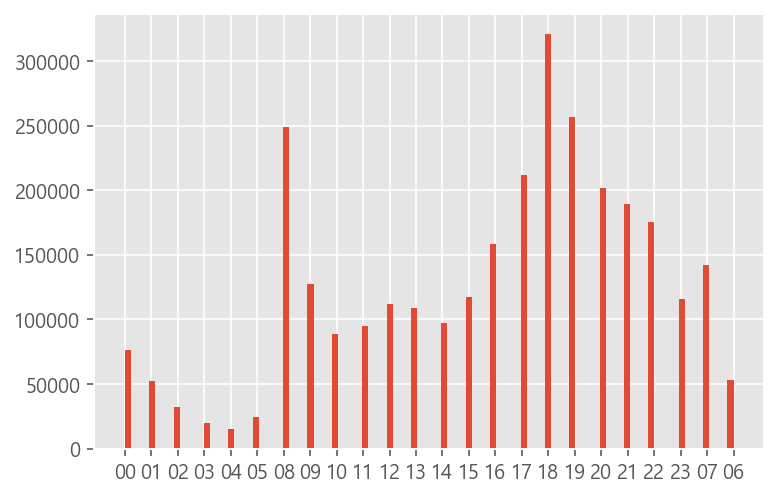

In [105]:
weekday_data['반납시간'].hist(bins=100)

In [42]:
# 평일 데이터 주로 대여하는 시간 파악하기 

df[~(df['반납요일']=='토')&~(df['반납요일']=='일')][['대여시간']].value_counts().head(10)

대여시간
18      333188
17      243002
08      239471
19      234576
20      193618
21      179582
16      173352
07      168250
22      152336
15      127169
dtype: int64

In [43]:
# 평일 데이터 주로 반납하는 시간 파악하기 

df[~(df['반납요일']=='토')&~(df['반납요일']=='일')][['반납시간']].value_counts().head(10)

반납시간
18      320500
19      256495
08      249098
17      212070
20      201713
21      189534
22      175723
16      157962
07      142225
09      127370
dtype: int64

In [113]:
weekday_data[['대여 소재지','반납 소재지']].value_counts().head(10)

대여 소재지  반납 소재지
강서구     강서구       332751
송파구     송파구       239637
영등포구    영등포구      171806
양천구     양천구       139506
노원구     노원구       137045
마포구     마포구       117048
강동구     강동구       112992
광진구     광진구       107757
구로구     구로구        78035
동대문구    동대문구       68809
dtype: int64

In [114]:
weekday_data[['대여 소재지','대여소 동','반납 소재지','반납소 동']].value_counts().head(10)

대여 소재지  대여소 동  반납 소재지  반납소 동
강서구     가양1동   강서구     가양1동     63381
영등포구    여의동    영등포구    여의동      28735
노원구     상계동    노원구     상계동      21185
마포구     상암동    마포구     상암동      20947
강서구     발산1동   강서구     발산1동     14286
양천구     목5동    양천구     목5동      13875
구로구     오류2동   구로구     오류2동     13433
강서구     공항동    강서구     공항동      13008
                       가양1동     12649
        발산1동   강서구     가양1동     11994
dtype: int64

In [115]:
weekday_data[(weekday_data['대여소 동']=='가양1동')&(weekday_data['반납소 동']=='가양1동')][['대여 대여소명','반납대여소명']].value_counts().head(20)

대여 대여소명                        반납대여소명       
코오롱One&Only타워                  마곡나루역 3번 출구      898
LG유플러스 마곡사옥                    마곡나루역 3번 출구      745
마곡나루역 3번 출구                    LG유플러스 마곡사옥      526
마곡나루역 2번 출구                    LG유플러스 마곡사옥      473
서남환경공원 버스정류장                   마곡나루역 2번 출구      464
센서텍㈜                           마곡나루역 3번 출구      460
마곡나루역 5번출구 뒤편                  마곡센트럴타워 1차       438
마곡나루역 3번 출구                    코오롱One&Only타워    436
벽산아파트                          양천향교역8번출구        425
마곡나루역 2번 출구                    코오롱One&Only타워    423
                               서울식물원 잔디마당 앞     421
마곡나루역 5번출구 뒤편                  LG유플러스 마곡사옥      417
                               코오롱One&Only타워    368
마곡나루역 2번 출구                    마곡나루역 2번 출구      367
LG유플러스 마곡사옥                    마곡나루역 2번 출구      363
마곡나루역 2번 출구                    힐스테이트에코          362
마곡센트럴타워 1차                     마곡나루역 5번출구 뒤편    350
마곡나루역 2번 출구                    서남환경공원 버스정류장     348
서울식물원 잔디마당 앞       

In [119]:
weekday_data[(weekday_data['대여 대여소명']=='코오롱One&Only타워')&(weekday_data['반납대여소명']=='마곡나루역 3번 출구')][['대여시간','이용시간']].value_counts().head(20)

대여시간  이용시간
18    3       133
      4       122
17    4       116
      3        98
16    4        39
      3        37
17    2        35
18    2        27
      5        24
17    5        20
19    4        15
      3        14
15    3        13
08    4        13
      3        11
07    4         9
      3         9
15    4         8
21    4         8
20    4         8
dtype: int64

array([[<AxesSubplot:title={'center':'이용시간'}>]], dtype=object)

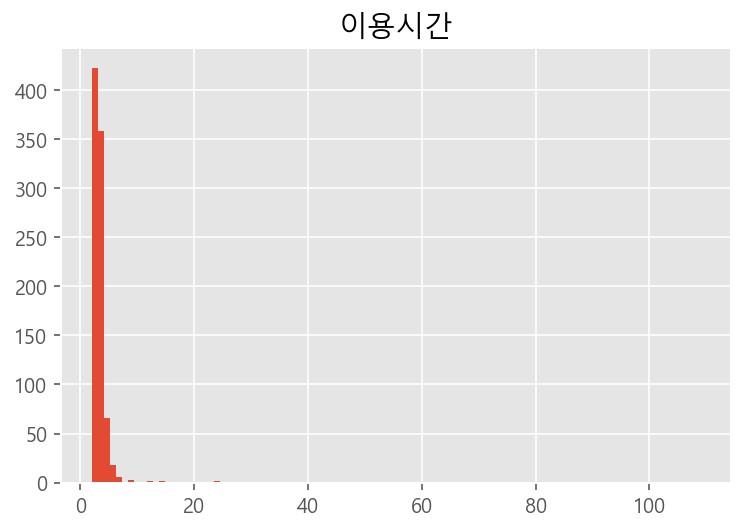

In [130]:
weekday_data[(weekday_data['대여 대여소명']=='코오롱One&Only타워')&(weekday_data['반납대여소명']=='마곡나루역 3번 출구')][['대여시간','이용시간']].hist(bins=100)

In [122]:
weekend_data[['대여 소재지','반납 소재지']].value_counts().head(10)

대여 소재지  반납 소재지
강서구     강서구       107573
송파구     송파구        93209
영등포구    영등포구       61215
노원구     노원구        54021
양천구     양천구        53400
마포구     마포구        46811
광진구     광진구        43708
강동구     강동구        42709
관악구     관악구        27770
구로구     구로구        27760
dtype: int64

In [120]:
weekend_data[['대여 소재지','대여소 동','반납 소재지','반납소 동']].value_counts().head(10)

대여 소재지  대여소 동  반납 소재지  반납소 동
강서구     가양1동   강서구     가양1동     16931
영등포구    여의동    영등포구    여의동      10203
노원구     상계동    노원구     상계동       8736
마포구     상암동    마포구     상암동       5754
양천구     목5동    양천구     목5동       5518
구로구     오류2동   구로구     오류2동      4649
강서구     발산1동   강서구     발산1동      4427
은평구     진관동    은평구     진관동       4358
강서구     공항동    강서구     공항동       4270
송파구     오륜동    송파구     오륜동       3984
dtype: int64

In [123]:
weekend_data[(weekend_data['대여소 동']=='가양1동')&(weekend_data['반납소 동']=='가양1동')][['대여 대여소명','반납대여소명']].value_counts().head(20)

대여 대여소명                        반납대여소명                       
마곡나루역 2번 출구                    마곡나루역 2번 출구                      190
양천향교역 7번출구앞                    양천향교역 7번출구앞                      155
                               발산역 1번, 9번 인근 대여소                139
벽산아파트                          양천향교역8번출구                        134
마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)  마곡나루역 3번 출구                      132
서남환경공원 버스정류장                   마곡나루역 2번 출구                      132
마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)  마곡나루역 2번 출구                      129
마곡나루역 3번 출구                    마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)    122
마곡나루역 2번 출구                    마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)    120
마곡 문영비지웍스                      양천향교역 7번출구앞                      116
등촌1-10단지 교차로                   발산역 1번, 9번 인근 대여소                113
마곡나루역 2번 출구                    서남환경공원 버스정류장                     110
양천향교역 7번출구앞                    마곡 문영비지웍스                        103
                               등촌1-10단지 교차로            

array([[<AxesSubplot:title={'center':'이용시간'}>]], dtype=object)

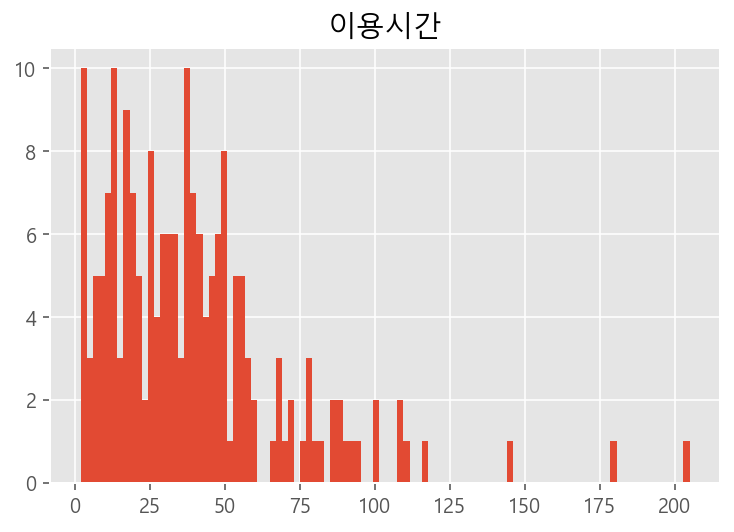

In [126]:
weekend_data[(weekend_data['대여 대여소명']=='마곡나루역 2번 출구')&(weekend_data['반납대여소명']=='마곡나루역 2번 출구')][['이용시간']].hist(bins=100)

In [94]:
df[['대여 소재지','대여소 동','반납 소재지','반납소 동']].value_counts().head(20)

대여 소재지  대여소 동  반납 소재지  반납소 동
강서구     가양1동   강서구     가양1동     80312
영등포구    여의동    영등포구    여의동      38938
노원구     상계동    노원구     상계동      29921
마포구     상암동    마포구     상암동      26701
양천구     목5동    양천구     목5동      19393
강서구     발산1동   강서구     발산1동     18713
구로구     오류2동   구로구     오류2동     18082
강서구     공항동    강서구     공항동      17278
                       가양1동     16292
        가양1동   강서구     공항동      15260
        발산1동   강서구     가양1동     15174
은평구     진관동    은평구     진관동      14483
강서구     가양1동   강서구     발산1동     14116
영등포구    문래동    영등포구    문래동      13451
금천구     가산동    금천구     가산동      12758
송파구     오륜동    송파구     오륜동      12498
양천구     목1동    양천구     목1동      12421
강서구     방화1동   강서구     방화1동     12326
용산구     한강로동   용산구     한강로동     12194
강서구     가양1동   강서구     방화1동     12167
dtype: int64

In [116]:
df[['대여 소재지','대여소 동','반납 소재지','반납소 동']].value_counts().head(20)

대여시간  이용시간
18    3       135
      4       125
17    4       116
      3        99
16    4        41
      3        38
17    2        35
18    2        28
      5        25
17    5        20
19    4        15
      3        15
08    4        13
15    3        13
08    3        11
07    3         9
      4         9
21    4         9
15    4         8
20    4         8
dtype: int64

In [8]:
df[['반납소 동']].value_counts().head(10)

반납소 동
가양1동     154840
여의동       75681
상계동       65626
목1동       54917
발산1동      51740
공항동       51675
목5동       49016
잠실6동      43604
오륜동       41146
상암동       40402
dtype: int64

In [9]:
df.isna().sum()

자전거번호          0
대여일시           0
대여 대여소번호       0
대여 대여소명        0
대여거치대          0
반납일시           0
반납대여소번호        0
반납대여소명         0
이용시간           0
이용거리           0
대여 소재지         0
대여소 위도         0
대여소 경도         0
대여소 주소         0
대여소 동          0
반납 소재지         0
반납소 위도         0
반납소 경도         0
반납소 주소         0
반납소 동          0
대여소근처역         0
대여소Distance    0
반납소근처역         0
반납소Distance    0
대여일            0
대여시간           0
대여요일           0
반납일            0
반납시간           0
반납요일           0
dtype: int64

In [90]:
df[['대여 소재지','반납 소재지']].value_counts().head(20)

대여 소재지  반납 소재지
강서구     강서구       440324
송파구     송파구       332846
영등포구    영등포구      233021
양천구     양천구       192906
노원구     노원구       191066
마포구     마포구       163859
강동구     강동구       155701
광진구     광진구       151465
구로구     구로구       105795
중랑구     중랑구        95165
동대문구    동대문구       93096
은평구     은평구        91655
관악구     관악구        91310
성동구     성동구        90440
서초구     서초구        88931
종로구     종로구        79889
강남구     강남구        77721
성북구     성북구        63191
용산구     용산구        59854
도봉구     도봉구        57390
dtype: int64

In [11]:
df[['대여 소재지']].value_counts().head(10)

대여 소재지
강서구       474981
송파구       387931
영등포구      314153
양천구       242547
노원구       237010
마포구       227395
광진구       201661
강동구       186843
구로구       163682
성동구       157988
dtype: int64

In [12]:
df[['반납 소재지']].value_counts().head(10)

반납 소재지
강서구       478443
송파구       388424
영등포구      311849
양천구       244798
노원구       237811
마포구       226733
광진구       200148
강동구       190857
구로구       164082
성동구       158084
dtype: int64

In [13]:
df[df['대여 소재지']=='강서구']['대여소 동'].value_counts()

가양1동    154280
발산1동     52831
공항동      52300
방화1동     39169
우장산동     28254
등촌1동     20915
등촌3동     19710
염창동      17376
화곡6동     15912
화곡1동     13678
가양동      11864
등촌2동     10177
방화3동     10070
가양3동      7795
방화2동      5413
화곡본동      5355
가양2동      4157
화곡4동      2515
화곡8동      1831
화곡2동      1379
Name: 대여소 동, dtype: int64

In [14]:
df[df['반납 소재지']=='강서구']['반납소 동'].value_counts()

가양1동    154840
발산1동     51740
공항동      51675
방화1동     39582
우장산동     27048
등촌1동     20893
등촌3동     19914
염창동      18066
화곡6동     16843
화곡1동     14396
가양동      12937
방화3동     10354
등촌2동      9510
가양3동      8645
방화2동      5681
화곡본동      4897
가양2동      4267
화곡8동      2672
화곡4동      2648
화곡2동      1835
Name: 반납소 동, dtype: int64

In [15]:
df[df['대여 소재지']=='송파구']['대여소 동'].value_counts()

잠실6동    43251
오륜동     41579
잠실3동    31928
문정2동    24429
위례동     19933
석촌동     18803
오금동     18620
잠실2동    18085
장지동     14893
송파1동    13576
방이1동    12927
문정1동    12483
방이2동    12327
삼전동     11963
잠실본동    11515
가락본동    10220
행정동      8501
가락2동     8072
송파2동     7702
가락1동     7637
풍납1동     6929
잠실7동     6909
거여2동     6619
성내1동     6186
마천2동     3790
마천1동     3606
거여1동     3501
흑석동      1947
Name: 대여소 동, dtype: int64

In [16]:
df[df['반납 소재지']=='송파구']['반납소 동'].value_counts()

잠실6동    43604
오륜동     41146
잠실3동    31938
문정2동    24722
위례동     19856
오금동     18966
석촌동     18942
잠실2동    17922
장지동     13697
송파1동    13662
삼전동     12925
방이1동    12486
문정1동    12420
방이2동    12389
잠실본동    12170
가락본동     9993
행정동      8476
가락2동     7978
송파2동     7667
가락1동     7578
풍납1동     7121
잠실7동     6858
거여2동     6718
성내1동     6150
마천2동     4101
거여1동     3507
마천1동     3454
흑석동      1978
Name: 반납소 동, dtype: int64

In [17]:
df[df['반납 소재지']=='강서구']['반납소 동'].value_counts().tail()

화곡본동    4897
가양2동    4267
화곡8동    2672
화곡4동    2648
화곡2동    1835
Name: 반납소 동, dtype: int64